# Graded Challenge 6 - Phase 1
Muhammad Ikhsan Rahman Hakim - FTDS001

#### Problem Statement
A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

- The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
- A sizeable department has to be maintained, for the purposes of recruiting new talent
- More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company


Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

Since you are one of the star analysts at the firm, this project has been given to you.

#### Goal of the case study
You are required to model the probability of attrition. (*Target: Attrition*)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, roc_curve, auc, classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# Data Loading

In [2]:
# we can see all the columns
pd.set_option('display.max_columns', 100)

# to make this notebook's output stable across runs
np.random.seed(42)

In [3]:
rawdf = pd.read_csv('general_data.csv')

# Dataset Exploration

In [4]:
rawdf.shape

(4410, 24)

In [5]:
rawdf.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [6]:
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [7]:
# for numerical columns or you can use df.describe()
num_column = list(rawdf.select_dtypes("number").columns)
rawdf[num_column].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


In [8]:
# for categorical value
cat_column = list(rawdf.select_dtypes(object).drop(columns = ["Attrition"]).columns)
rawdf[cat_column].describe().T

,count,unique,top,freq
BusinessTravel,4410,3,Travel_Rarely,3129
Department,4410,3,Research & Development,2883
EducationField,4410,6,Life Sciences,1818
Gender,4410,2,Male,2646
JobRole,4410,9,Sales Executive,978
MaritalStatus,4410,3,Married,2019
Over18,4410,1,Y,4410


# Data Cleaning

In [9]:
rawdf.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [10]:
rawdf['NumCompaniesWorked'].fillna(rawdf['NumCompaniesWorked'].median(), inplace=True)
rawdf['TotalWorkingYears'].fillna(rawdf['TotalWorkingYears'].median(), inplace=True)

In [11]:
print(f"Is there any duplicated rows? \n{rawdf.duplicated().any()}")
print(f"\nHow many? \n{rawdf.duplicated().sum()} rows")

Is there any duplicated rows? 
False

How many? 
0 rows


# EDA

In [12]:
# set plot style for EDA
plt.style.use('fivethirtyeight')

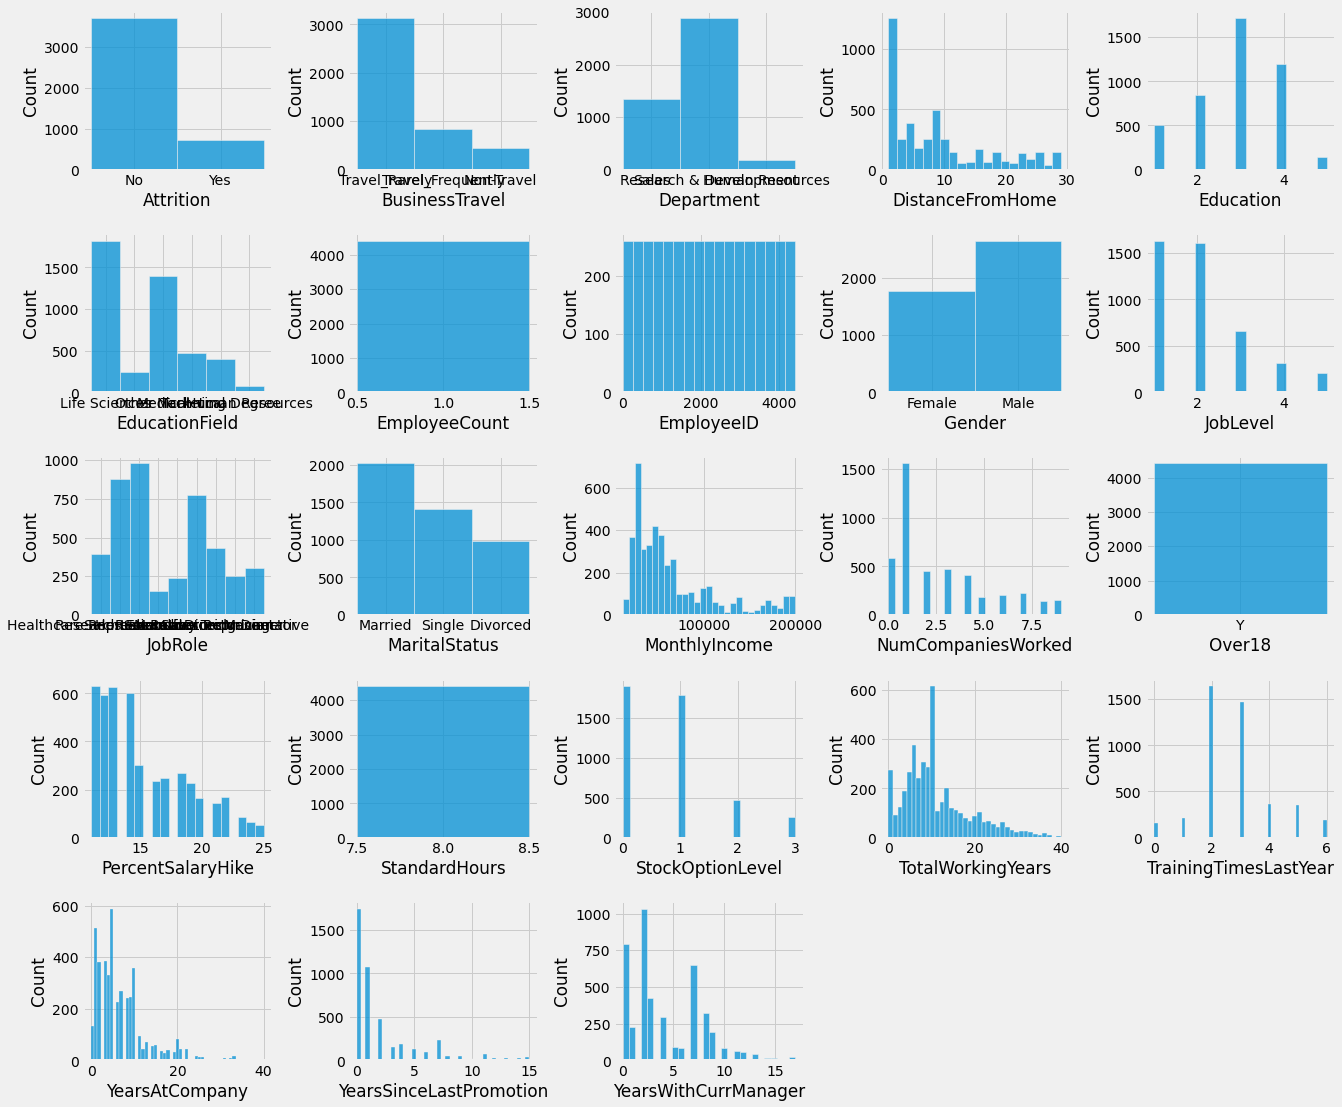

In [13]:
fig = plt.figure(figsize=(20, 18))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, len(rawdf.columns)):
    ax = fig.add_subplot(5, 5, i)
    #ax.hist(rawdf[rawdf.columns[i]])
    sns.histplot(rawdf[rawdf.columns[i]])
    plt.xlabel(rawdf.columns[i])

- Dari hasil plot distribusi diatas rata-rata data tidak terdistibusi secara normal (skewed).
- Seluruh karyawan berusia diatas 18 tahun.
- Seluruh karyawan memiliki jam kerja standard yang sama.
- Rata-rata karyawan telah bekerja di bawah 20 tahun.

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

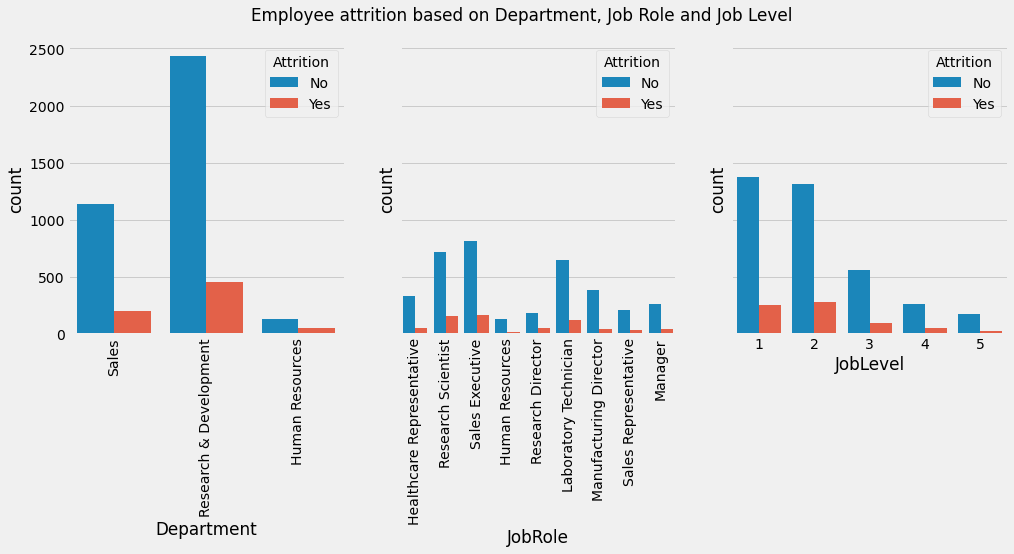

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Employee attrition based on Department, Job Role and Job Level')

# department
labels = list(rawdf['Department'].unique())
sns.countplot(ax=axes[0], x=rawdf['Department'], hue=rawdf['Attrition'], data=rawdf)
axes[0].set_xticklabels(labels, rotation=90)
# axes[0].set_title('Employee Attrition based on Job Role')

# jobrole
labels = list(rawdf['JobRole'].unique())
sns.countplot(ax=axes[1], x=rawdf['JobRole'], hue=rawdf['Attrition'], data=rawdf)
axes[1].set_xticklabels(labels, rotation=90)
# axes[1].set_title('Employee Attrition based on Department')

# joblevel
sns.countplot(ax=axes[2], x=rawdf['JobLevel'], hue=rawdf['Attrition'], data=rawdf)
# axes[2].set_title('Employee Attrition based on Job Level')

Dari hasil plot dapat dilihat bahwa, rata-rata karyawan yang pindah adalah karyawan departemen RnD dengan Job Level 1 atau 2. Dari role karyawan, paling banyak adalah Research scientist dan sales executive.

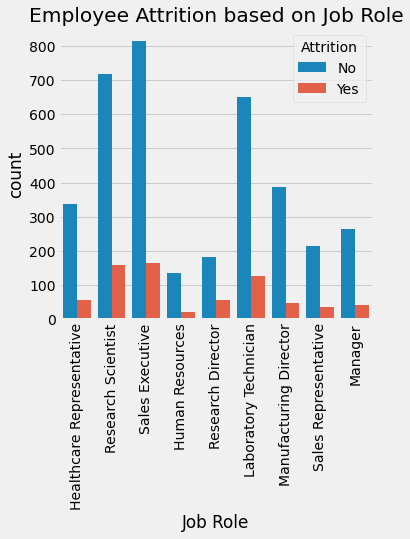

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(x=rawdf['JobRole'], hue=rawdf['Attrition'], data=rawdf)
plt.title('Employee Attrition based on Job Role')
plt.xticks(rotation=90)
plt.xlabel('Job Role')
plt.show()

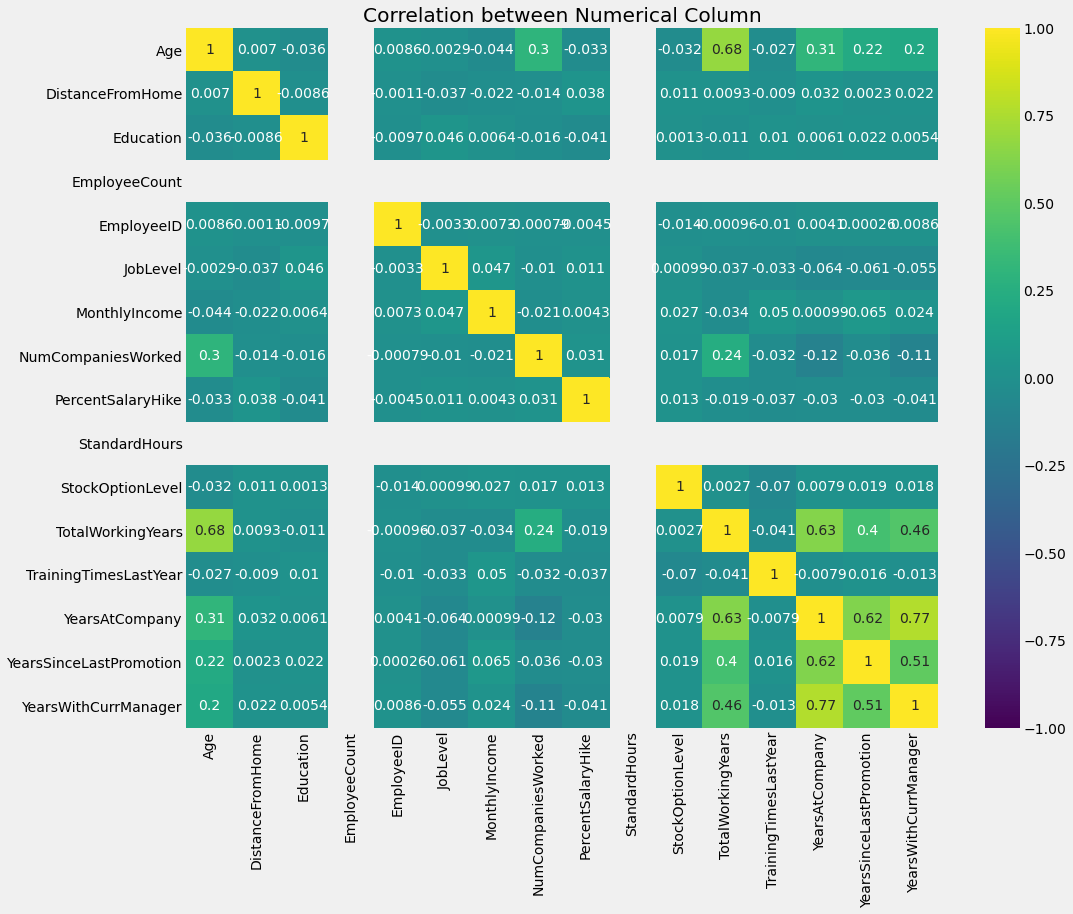

In [16]:
corr = rawdf[num_column].corr(method = 'pearson')

plt.figure(figsize = (15, 12))
sns.heatmap(corr, cmap='viridis', vmin=-1, vmax=1, annot=True)
            
plt.title("Correlation between Numerical Column")
plt.show()

Korelasi antar kolom numerik. Employee count dan standard hours menghasilkan matrix seperti itu dikarenakan mereka hanya memiliki 1 nilai.

Dikarenakan features harus independent, maka saya akan drop features(column) yang memiliki korelasi yang kuat dengan kolom lainnya (>0.5).

Yang di drop adalah:
- EmployeeID
- Employee counts
- standard hours
- totalworkingyears
- yearsatcompany
- yearssincelastpromotion
- yearswithcurrmanager

# Data Preprocessing
## Features selection

In [17]:
new_df = rawdf.drop(columns = ['EmployeeID', 'EmployeeCount', 'StandardHours', 'TotalWorkingYears', 'YearsAtCompany',
                              'YearsSinceLastPromotion', 'YearsWithCurrManager'])

In [18]:
new_df.shape

(4410, 17)

In [19]:
new_df.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,0,6
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,Y,23,1,3
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,Y,15,3,2
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,Y,11,3,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,Y,12,2,2


## Features encoding
### Business Travel

In [20]:
BusinessTravel_dummies = pd.get_dummies(new_df['BusinessTravel'], prefix = 'BusinessTravel')
new_df = pd.concat([new_df, BusinessTravel_dummies], axis = 1)

### Department	

In [21]:
Department_dummies = pd.get_dummies(new_df['Department'], prefix = 'Department')
new_df = pd.concat([new_df, Department_dummies], axis = 1)

In [22]:
new_df.loc[:,new_df.columns.str.contains('Department')].head(3)

,Department,Department_Human Resources,Department_Research & Development,Department_Sales
0,Sales,0,0,1
1,Research & Development,0,1,0
2,Research & Development,0,1,0


### EducationField	

In [23]:
EducationField_dummies = pd.get_dummies(new_df['EducationField'], prefix = 'EducationField')
new_df = pd.concat([new_df, EducationField_dummies], axis = 1)

In [24]:
new_df.loc[:,new_df.columns.str.contains('EducationField')].head(3)

,EducationField,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,Life Sciences,0,1,0,0,0,0
1,Life Sciences,0,1,0,0,0,0
2,Other,0,0,0,0,1,0


### Gender

In [25]:
Gender_dummies = pd.get_dummies(new_df['Gender'], prefix = 'Gender')
new_df = pd.concat([new_df, Gender_dummies], axis = 1)

### JobRole

In [26]:
JobRole_dummies = pd.get_dummies(new_df['JobRole'], prefix = 'JobRole')
new_df = pd.concat([new_df, JobRole_dummies], axis = 1)

### MaritalStatus

In [27]:
MaritalStatus_dummies = pd.get_dummies(new_df['MaritalStatus'], prefix = 'MaritalStatus')
new_df = pd.concat([new_df, MaritalStatus_dummies], axis = 1)

## Target Encoding

In [28]:
new_df['Attrition'].replace(['No', 'Yes'],[0,1], inplace=True)

In [29]:
new_df.drop(columns = cat_column, inplace = True)

In [30]:
new_df.head(5)

,Age,Attrition,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,0,6,2,1,131160,1.0,11,0,6,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
1,31,1,10,1,1,41890,0.0,23,1,3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,32,0,17,4,4,193280,1.0,15,3,2,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,38,0,2,5,3,83210,3.0,11,3,5,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
4,32,0,10,1,1,23420,4.0,12,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [31]:
new_df.shape

(4410, 36)

## Split dataset to features (X) dan target (y)

In [32]:
X = new_df.drop(columns = ["Attrition"])
y = new_df["Attrition"]

## Split dataset

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify= y, random_state = 42)

# Define Model, Training, Improvement (with best params) and Evaluation

## Using pipeline

In [38]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), ('classifier', RandomForestClassifier(random_state=42))])

In [39]:
param_grid = [
    {'classifier': [RandomForestClassifier(random_state=42)],
     'preprocessing': [MinMaxScaler(), None],
     'classifier__n_estimators': [100, 200, 300],
     'classifier__criterion': ['entropy', 'gini'],
     'classifier__max_features': ['auto', 'sqrt'],
     'classifier__max_depth': [2, 3, 5]},
    {'classifier': [LogisticRegression(random_state=42)],
     'preprocessing': [MinMaxScaler(), None],
     'classifier__C': [0.1, 0.5, 1],
     'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear'],
     'classifier__verbose': [1, 2, 3]}
]

In [40]:
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1,verbose=2)
grid.fit(X_train, y_train)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\mistersunday\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mistersunday\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Best params:
{'classifier': LogisticRegression(C=0.1, random_state=42, solver='newton-cg', verbose=1), 'classifier__C': 0.1, 'classifier__solver': 'newton-cg', 'classifier__verbose': 1, 'preprocessing': None}

Best cross-validation score: 0.84
Test-set score: 0.84


C:\Users\mistersunday\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mistersunday\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mistersunday\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mistersunday\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\mistersunday\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm

## Model Evaluation

In [42]:
y_test_pred = grid.predict(X_test)

print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
print(f"F1 SCORE:\n{f1_score(y_test, y_test_pred)}")
print(f"ROC_AUC SCORE:\n{roc_auc_score(y_test, y_test_pred)}\n")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, y_test_pred)}")

CONFUSION MATRIX:
[[1098   12]
 [ 196   17]]
ACCURACY SCORE:
0.8428
F1 SCORE:
0.14049586776859505
ROC_AUC SCORE:
0.5345006978809796

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1110
           1       0.59      0.08      0.14       213

    accuracy                           0.84      1323
   macro avg       0.72      0.53      0.53      1323
weighted avg       0.81      0.84      0.79      1323



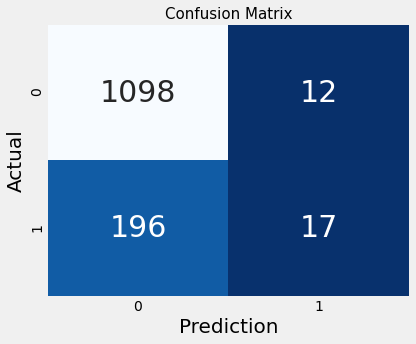

In [46]:
plt.figure(figsize = (6, 5))
sns.heatmap(
        confusion_matrix(y_test, y_test_pred),
        annot = True,
        fmt = '.0f',
        cmap = 'Blues_r', cbar=False,
        annot_kws={"fontsize":30}
    )
plt.xlabel("Prediction", fontsize = 20)
plt.ylabel("Actual", fontsize = 20)
plt.title("Confusion Matrix", fontsize = 15)

plt.tight_layout()
plt.show()

# Model Inference

In [44]:
pred_result = []

model_pred = grid.predict(X_test)
pred_result.append(model_pred)

In [45]:
#insert predict result to dataframe
pred_result_log = pd.DataFrame({
    "Actual Target":y_test,
    "Prediction with RF":pred_result[0]
})
pred_result_log.head()

,Actual Target,Prediction with RF
3662,1,0
2179,0,0
110,1,0
2473,0,0
3000,0,0


# Conclusion
### Insights from EDA

1. Dari hasil plot distribusi dataset menunjukkan bahwa rata-rata data tidak terdistibusi secara normal (skewed).
2. Seluruh karyawan berusia diatas 18 tahun dan memiliki jam kerja standard yang sama yakni 8 jam perhari.
3. Rata-rata karyawan yang pindah berdasarkan pengelompokkan antar Department adalah karyawan di departemen Research and Development. Sementara berdasarkan Tingkatan Jabatan, karyawan yang pindah berasal dari tingkat 1 dan 2 dengan jumlah yang hampir sama. Lalu dari Posisi Pekerjaan, paling banyak dari Sales Executive dan Research Scientist, disusul Laboratory Technician pada peringkat ketiga.



### Model Analysis

| Accuracy | f1 Score | ROC_AUC |
| :-: | :-: | :-: |
| 0.84 | 0.14 | 0.53

Saya mencoba memprediksi dataset ini menggunakan Logistic Regression dan Random Forest, karena kecepatan dari Logistic Regression dan Akurasi yang cukup tinggi dari Random Forest. Berdasarkan hyperparamater tuning menggunakan gridsearchCV, model dan hyperparameter terbaik untuk dataset ini adalah Logistic Regression dengan akurasi yang cukup tinggi 0.84

Namun berdasarkan f1 score, model ini mendapatkan skor yang sangat rendah sekali. Hasil dari confussion matrix pun juga tidak bagus. Model ini dirasa masih belum mampu memprediksi dengan baik karena nilai True Positive yang sangat rendah (17) dan False Negative yang tinggi (196). Artinya apa? Model hanya mampu memprediksi dengan tepat karyawan yang tidak akan pindah dibanding yang akan pindah (sementara goal kita adalah yang kedua). Untuk nilai False Negative adalah jumlah kesalahan prediksi model ini, 196 kali kesalahan prediksi adalah jumlah yang sangat besar.

Kemungkinan hal ini terjadi antara lain:
- Kurangnya jumlah sample dataset.
- Model hanya belajar dari jumlah karyawan yang tidak resign dibandingkan yang resign (imbalanced data)
- Model tidak cocok dengan dataset ini.

**Confusion Matrix:**

| True Negative | False Positive | False Negative | True Positive
| :-: | :-: | :-: | :-: |
| 1098 | 12 | 196 | 17 |

<br>
<br>
